# Plot of validation test

This notebook plots the validation test for multiple inversions. It plots the values of the goal function for all the inversions resulted from multiple inversion notebook.

In [1]:
import numpy as np
import cPickle as pickle

In [2]:
# importing my functions
import sys
sys.path.insert(0, '../../code')

import mag_polyprism_functions as mfun

/home/leonardo/anaconda2/lib/python2.7/site-packages/fatiando/vis/mpl.py:76: UserWarning: This module will be removed in v0.6. We recommend the use of matplotlib.pyplot module directly. Some of the fatiando specific functions will remain.
  "specific functions will remain.")


In [36]:
# importing the pickle file of results
result_path = 'l2-tfa-inversion/multiple-33665/'

with open(result_path+'inversion.pickle') as w:
        inversion = pickle.load(w)

In [37]:
# directory to save the figures
#filename = '../../l1-manuscript/figures/'+result_path[5:10]+'-l2-gamma.png'
filename = ''

In [38]:
z0 = inversion['z0']
intensity = inversion['intensity']
z0_plot, int_plot = np.meshgrid(z0, intensity)
z0_plot = z0_plot.ravel()
int_plot = int_plot.ravel()
n = z0.size
m = intensity.size
N = inversion['x'].size

In [39]:
# building the matrix of the goal function
gamma_matrix = mfun.goal_matrix(n, m, inversion['results'])

In [40]:
np.min(gamma_matrix)

70.69283376165613

In [41]:
np.argmin(gamma_matrix)

17

In [42]:
np.argwhere(gamma_matrix<=29.5)

array([], shape=(0, 2), dtype=int64)

In [43]:
# building the matrix of the misfit function
phi_matrix = mfun.misfit_matrix(n, m, inversion['results'])

In [44]:
np.min(phi_matrix)

47.309455214882846

In [45]:
np.argmin(phi_matrix)

3

In [46]:
np.argwhere(phi_matrix<=15.)

array([], shape=(0, 2), dtype=int64)

In [47]:
inversion['regularization']

array([1.e-03, 1.e-03, 0.e+00, 0.e+00, 1.e-06, 1.e-07, 1.e-05])

# Figures

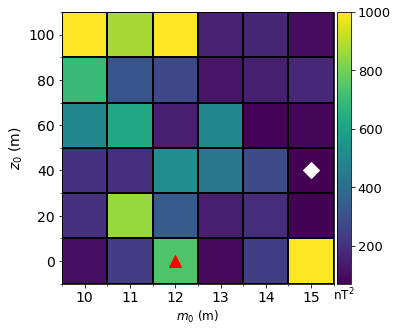

In [49]:
mfun.plot_matrix(z0, intensity, gamma_matrix, int(np.min(gamma_matrix)),
                 1000., [[2,5]], '$m_0$ (m)', '$z_0$ (m)', 'nT$^2$',
                 (6,5), 1200, [0,2], filename)

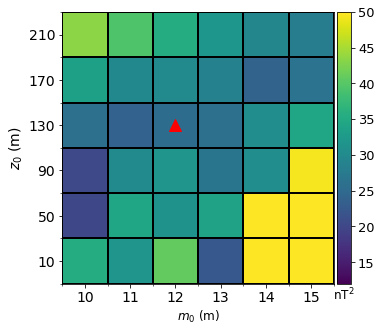

In [16]:
mfun.plot_matrix(z0, intensity, phi_matrix, 12., 50., [], '$m_0$ (m)', '$z_0$ (m)', 'nT$^2$', [3,2])